#EDA and Text Preprocessing

---



* We need to aim our approach & method in a structured manner and the exploratory data analytics (EDA) steps plays a huge part in it. It is also true for text data in NLP.

* Inconsistent results from the NLP applications can be minimized if we use right kind of preprocessing on text corpus. 

* One type of pre-processing may not be suitable for other, so it's task dependent.

* Let’s say you are trying to discover commonly used words in a news dataset. If your pre-processing step involves removing stop words because some other task used it, then you are probably going to miss out on some of the common words as you have ALREADY eliminated it. So really, it’s not a one-size-fits-all approach.

#Data Set Information & Context:

##Tweets from Donald Trump between 2009 and 2020.

- The data has got Content , Date, Nu. of Retweet, No. of Favorites, column of account mention of the tweets.
- The data has got  pre labelled sentiment(Positive and negative) column for each content of tweets.
- We will be  exploring and analyzing  relevant columns of the data.
- We will be applying all necessary text pre processing steps on content column of the tweet data.


##**Steps:**
- Import necessary libraries.
- Get the data.
- Remove the column based on missing value and relevance of the column.
- Explore each column of the data.& plot the graphs and mention the observation and insights based on the outcome.
- Apply all necessary text pre processing steps on the required column.
- Plot  frequency, bar and word cloud charts based on the individual and interaction of the columns.
- Summarize the outcome from each steps, observation and insights.


Data Content:


- **id**: Unique tweet id

- **link**: Link to tweet

- **content**: Text of tweet

- **date**: Date of tweet

- **retweets**: Number of retweets

- **favorites**: Number of favorites

- **mentions**: Accounts mentioned in tweet

- **Sentiment**: Sentiment of each tweet in the content column

In [137]:
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus, installed with 'pip install wordcloud'
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus



In [ ]:
# from google.colab import files

# uploaded = files.upload()

In [138]:
tweets=pd.read_csv('trump_tweets.csv')                             #Importing the data

In [139]:
tweets.head()


,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
0,0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,positive
1,1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,positive
2,2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,positive
3,3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,positive
4,4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,positive


In [140]:
tweets.shape

(41122, 11)

In [141]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41122 non-null  int64  
 1   id          41122 non-null  int64  
 2   link        41122 non-null  object 
 3   content     41122 non-null  object 
 4   date        41122 non-null  object 
 5   retweets    41122 non-null  int64  
 6   favorites   41122 non-null  int64  
 7   mentions    22467 non-null  object 
 8   hashtags    5810 non-null   object 
 9   geo         0 non-null      float64
 10  Sentiment   41122 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.5+ MB


In [142]:
tweets.describe()

,Unnamed: 0,id,retweets,favorites,geo
count,41122.000000,4.112200e+04,41122.000000,41122.000000,0.0
mean,20560.500000,6.088909e+17,5455.590657,22356.899105,NaN
std,11871.043221,3.027946e+17,10130.076661,41501.859711,NaN
min,0.000000,1.698309e+09,0.000000,0.000000,NaN
25%,10280.250000,3.549428e+17,25.000000,28.000000,NaN
50%,20560.500000,5.609149e+17,291.000000,247.000000,NaN
75%,30840.750000,7.941218e+17,8778.000000,32970.750000,NaN
max,41121.000000,1.219077e+18,309892.000000,857678.000000,NaN


###Missing Value analysis

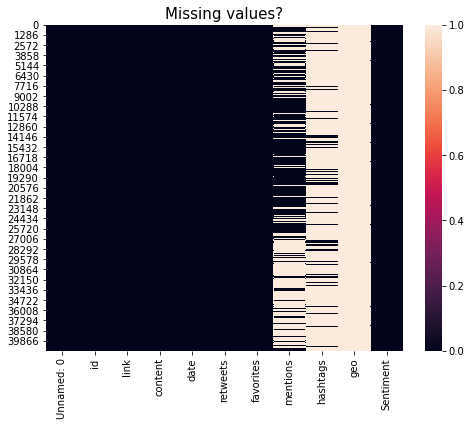

In [143]:
plt.figure(figsize=(8,6))
sns.heatmap(tweets.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- Based on the above plot, we can say as there are many of missing values in "mention" and "hashtags" columns.
- Geo column has got all missing values.

#### Quick look at geo location info

In [144]:
import folium 
from folium import plugins 

In [145]:
df_data_clean = pd.read_csv('data_engineer_clean_set.csv') 

In [146]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tran_id      1000 non-null   object 
 1   first_name   1000 non-null   object 
 2   last_name    1000 non-null   object 
 3   tran_date    1000 non-null   object 
 4   gender       1000 non-null   object 
 5   tran_value   1000 non-null   float64
 6   tran_hash    1000 non-null   object 
 7   tran_lat     1000 non-null   float64
 8   tran_long    1000 non-null   float64
 9   tran_type    1000 non-null   object 
 10  tran_status  1000 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [147]:
df_data_clean.head(10)

,tran_id,first_name,last_name,tran_date,gender,tran_value,tran_hash,tran_lat,tran_long,tran_type,tran_status
0,13Hd8QJ8HudP7FpBQEdJCAh5X77b1Xaw4w,Hamish,Lackney,2017/08/06,Male,282.23,902333f4266a7a5169dff64ebae42c8d,25.941937,117.365052,Kiwano,1
1,17cZCVzrg7iNCUGircG2Ztqb34Dd7F348W,Clare,Djekic,2018/05/08,Male,13.65,949e4080be65868200ae47353c63b2bf,43.074534,-89.380558,"Bag - Bread, White, Plain",4
2,1NoyL1rfxjyG8vwhXP46TQArPGXFecdFYg,Jerrie,Simmill,2017/11/13,Female,102.85,f2a521c2d954050fa8cdac83a5311ec6,32.930738,106.908966,Amarula Cream,5
3,1NoxjLFMCsFx2Mnt7i2yQpPtH2re4NU3Y9,Mikkel,Sreenan,2018/01/05,Male,67.93,d20bcd7c653f5677db7934f4c2221de3,8.337506,-82.551047,Coffee - Espresso,1
4,1E3AUUw5uvupCmGUKtk57ovecUygFhZJuf,Vernon,Champ,2017/11/18,Male,101.00,1d8979b666803580620d9a233e98b1cf,-6.107886,106.779179,Hot Choc Vending,5
5,13NGtpgntwge365NP8RAVFF9jk3KuTNymJ,Carver,Scheu,2017/01/22,Male,-18.42,1e52c0c2da4a90a772d2fcf67d794e6e,31.294176,121.320622,Tuna - Bluefin,1
6,14QMNGrizxhtbqJPS6p22j8o3iXNYb48Wr,Min,Tousey,2017/09/26,Female,175.74,58893c98a4ff821a0bf353ac605a4fa8,51.876118,104.842323,Steampan - Foil,5
7,1MUzTZyx2EmuU1TZAam27H69AxzhuPuBrp,Ibby,Adamsky,2018/06/28,Female,120.70,cef5d796c9fa5b3082334cec097d5d07,59.199182,17.835370,Sherbet - Raspberry,4
8,1BHEYr1vVm4V8pzvhvgyDBS2Lyrn6ZyP2K,Lonna,Valerio,2018/04/23,Female,81.58,8bd73170fb6afbea08c22d03872a1ff0,19.380393,-99.147691,Gatorade - Lemon Lime,3
9,16sG4tZuqgVAKNpUddJF8TWgx3kr7HBmt3,Farah,Berrey,2017/08/25,Female,115.97,25c43c7c94047c1a91f01d837ba9ecaf,47.931807,5.289360,Syrup - Monin - Granny Smith,1


In [148]:
map1 = folium.Map(location=[10.0, 10.0], tiles='CartoDB dark_matter', zoom_start=2.3)
for i, row in df_data_clean.iterrows():
    folium.CircleMarker([float(row['tran_lat']), float(row['tran_long'])], radius=1, color='#ef4f61', fill=True).add_to(map1)
map1

In [149]:
tweets.isna().sum()


Unnamed: 0        0
id                0
link              0
content           0
date              0
retweets          0
favorites         0
mentions      18655
hashtags      35312
geo           41122
Sentiment         0
dtype: int64

 * Geo column has got all values as nulls, hashtags have too many null values, mentions also have too many null values.

The below function, will give these output in Dataframe

- **Zero Values**
- **Missing Values**
- **% of Total Values**
- **Total Zero Missing Values**
- **% Total Zero Missing Values**
- **Data Type**

In [150]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(tweets)

Your selected dataframe has 11 columns and 41122 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
geo,0,41122,100.0,41122,100.0,float64
hashtags,0,35312,85.9,35312,85.9,object
mentions,0,18655,45.4,18655,45.4,object


* Geography column has got 100% missing value
* Hastags column has got 85%age missing values
* Mention column has got 45.4% missing value

In [151]:
#Drop the column which have got too many missing values or does not relevent information
tweets.drop(['Unnamed: 0', 'id','link','mentions','hashtags','geo'],axis=1,inplace=True)
tweets.shape

(41122, 5)

In [152]:
year=[]
month=[]
date=[]
hour=[]
for x in tweets['date']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

tweets['year']=year
tweets['month']=month
tweets['dates']=date
tweets['hour']=hour
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


####Most liked tweet durning Presidential year

In [154]:
president_date['favorites'].idxmax()

38625

In [156]:
president_date=president_year=tweets[((tweets['year']>=2017))]      # Extraction of Presidency year data
print(tweets.iloc[president_date['favorites'].idxmax()]['content'])                      # Most favorites tweet                   
print(tweets.iloc[president_date['favorites'].idxmax()]['year'])                         # Year of the most favorites tweet

A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
2019


 American rapper A$AP Rocky, whose case garnered international attention after celebrities and President Trump came to his defense, returned to the United States. He was released from custodyas he and two associates await an Aug. 14 verdict on assault charges.

####Most retweeted tweet durning presidential year

In [158]:
president_date['retweets'].idxmax()

32059

In [157]:
print(tweets.iloc[president_date['retweets'].idxmax()]['content'])                      # Most retweeted tweet 
print(tweets.iloc[president_date['retweets'].idxmax()]['year'])                         # Year of the most retweeted tweets

# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
2017


Text(0.5, 0.98, 'Characters in message')

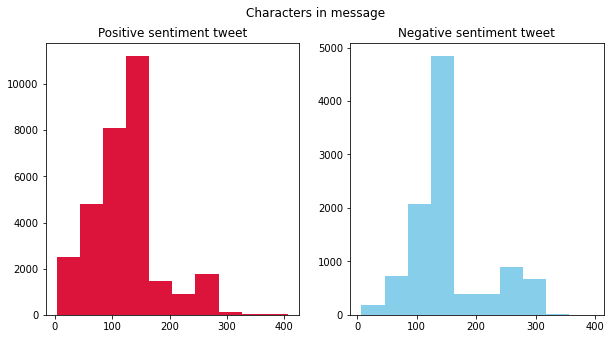

In [159]:
#Number of characters in tweets
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = tweets[tweets['Sentiment']=='positive']['content'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = tweets[tweets['Sentiment']=='negative']['content'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')
fig.suptitle('Characters in message')

Text(0.5, 0.98, 'Words in a tweet')

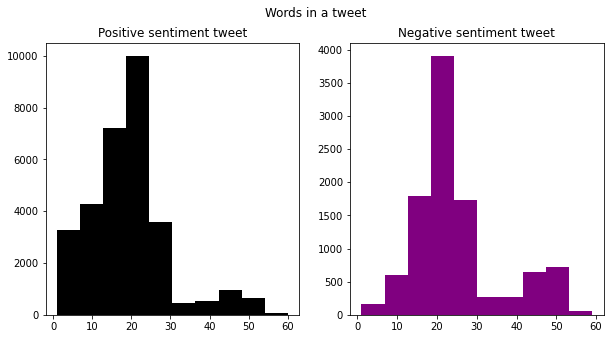

In [160]:
#Number of words in a tweet
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = tweets[tweets['Sentiment']=='positive']['content'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Positive sentiment tweet')
tweet_len = tweets[tweets['Sentiment']=='negative']['content'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Negative sentiment tweet')
fig.suptitle('Words in a tweet')

- **There is no substantial difference between positive and negative sentiment tweet with respect to the length fo character and words in the tweet.**

####Most active hour on twitter

In [165]:
Category=tweets['hour'].value_counts().sort_values()
Category

9      321
8      347
7      400
10     458
11     706
6      831
5     1258
12    1377
1     1522
0     1620
23    1704
2     1795
3     1974
18    2025
4     2076
19    2095
17    2146
13    2226
16    2319
14    2448
15    2544
20    2696
22    3050
21    3184
Name: hour, dtype: int64

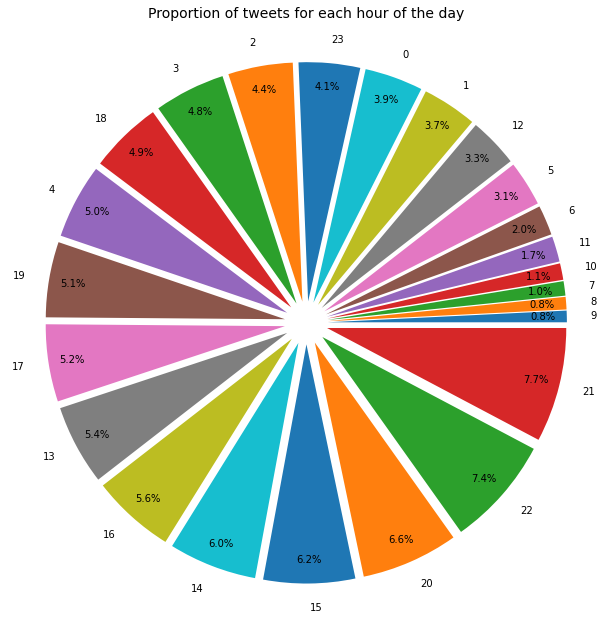

In [163]:
#Using matplotlib
Category=tweets['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

- **Trump tweets between 22:00 to 22:00 hour of the day at the most.**
- **Trump tweets are less at the morning our of the day.**

#### Number of tweet per day; retweet, favorite per Year

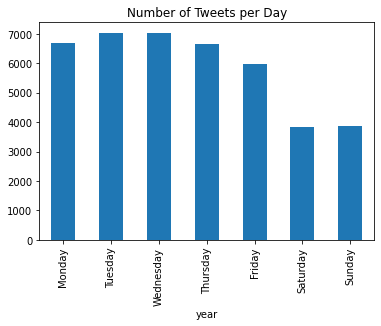

In [166]:
tweets['date'] = pd.to_datetime(tweets['date']) # To make sure that pandas understands it's a date
plt.figsize = (16,10)

plt.title("Number of Tweets per Day")
tweet_cpt = tweets["date"].groupby(tweets["date"].dt.day_name()).count()
tweet_cpt.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")    #Assigning each day of the week as index
plt.xlabel("day")
plt.show()

- **He tweeted more on weekdays than weekend.**

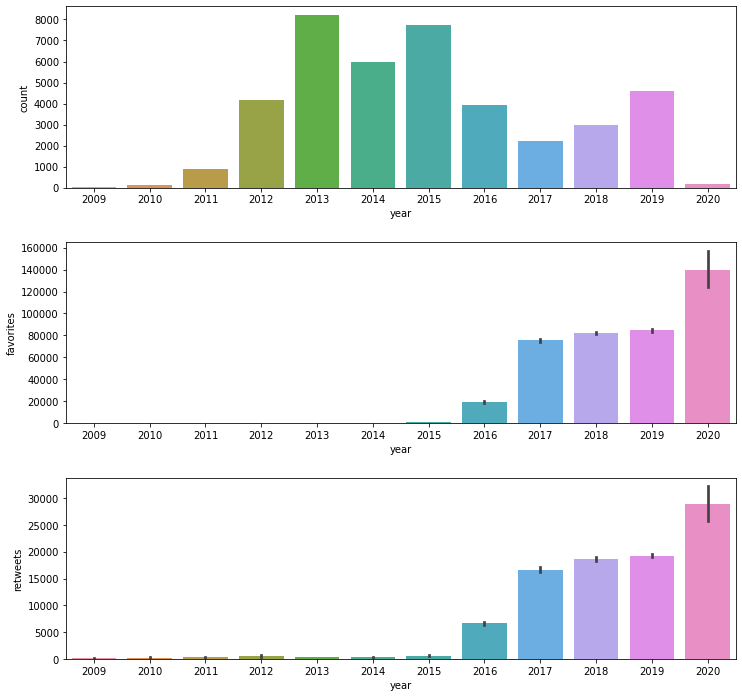

In [167]:
fig, ax = plt.subplots(3,1,figsize=(12,12))
plt.subplots_adjust(hspace=0.3)
sns.countplot(x='year', data=tweets, ax=ax[0])
sns.barplot(x='year', y='favorites', data=tweets, ax=ax[1])
sns.barplot(x='year', y='retweets', data=tweets, ax=ax[2]);

- ** He was quite active before his presidency but he gets his popularity after winning the presidency.**

- ** Re-tweets and favourites kept increasing during his presidency time, which shows that he became popular on twitter with time.**

In [ ]:
tweets.head()

###Text Preprocessing - removal of http links

In [168]:
# Removal of the http link using Regular Expression.
for i, row in tweets.iterrows():
    clean_tweet = re.sub(r"http\S+", "", tweets.at[i, 'content']) #loc, iloc
    tweets.at[i,'content'] = clean_tweet
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


In [170]:
# !pip install contractions           #Contraction packge help in expansion of contracted words
import contractions

#### Pre processing: De-contraction of words

In [169]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)




In [171]:
example_text = "They ain't comming 'cause it's too late"
example_text_clean = replace_contractions(example_text)
example_text_clean

'They are not comming because it is too late'

In [172]:
# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in tweets.iterrows():
    content = tweets.at[i, 'content']
    clean_content = replace_contractions(content)
    tweets.at[i,'content'] = clean_content
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


####Pre Processing : Removal of number

In [173]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text



In [174]:
example_text = "We visited the site 12 times"
example_text_clean = remove_numbers(example_text)
example_text_clean

'We visited the site  times'

In [175]:
tweets['content'] = tweets['content'].apply(lambda x: remove_numbers(x))
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


### Pre Processing - Tokenization

In [176]:
 import nltk
#  nltk.download('punkt')

In [177]:
tweets['content'] = tweets.apply(lambda row: nltk.word_tokenize(row['content']), axis=1) # Tokenization of data
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,"[Be, sure, to, tune, in, and, watch, Donald, T...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[Donald, Trump, will, be, appearing, on, The, ...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[Donald, Trump, reads, Top, Ten, Financial, Ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[New, Blog, Post, :, Celebrity, Apprentice, Fi...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[``, My, persona, will, never, be, that, of, a...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


####Remove non-ascii character

In [178]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [179]:
example_text = "Can you believe what John said!?!? 🐵 🙈 🙉 🙊"
example_text = nltk.word_tokenize(example_text)
example_text_clean = remove_non_ascii(example_text)
example_text_clean

['Can',
 'you',
 'believe',
 'what',
 'John',
 'said',
 '!',
 '?',
 '!',
 '?',
 '',
 '',
 '',
 '']

In [180]:
tweets['content'] = tweets['content'].apply(lambda x: remove_non_ascii(x))
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,"[Be, sure, to, tune, in, and, watch, Donald, T...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[Donald, Trump, will, be, appearing, on, The, ...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[Donald, Trump, reads, Top, Ten, Financial, Ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[New, Blog, Post, :, Celebrity, Apprentice, Fi...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[``, My, persona, will, never, be, that, of, a...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


###Preprocessing-Lowercase

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [181]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [182]:
example_text = "Can you believe what John said?!?!"
example_text = nltk.word_tokenize(example_text)
example_text_clean = to_lowercase(example_text)
example_text_clean

['can', 'you', 'believe', 'what', 'john', 'said', '?', '!', '?', '!']

In [183]:
tweets['content'] = tweets['content'].apply(lambda x: to_lowercase(x))
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,"[be, sure, to, tune, in, and, watch, donald, t...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, will, be, appearing, on, the, ...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, :, celebrity, apprentice, fi...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[``, my, persona, will, never, be, that, of, a...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


## Preprocessing: Removal of Punctuation

In [184]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [185]:
example_text = "Can you believe what John said!?!?"
example_text = nltk.word_tokenize(example_text)
example_text_clean = remove_punctuation(example_text)
example_text_clean

['Can', 'you', 'believe', 'what', 'John', 'said']

In [186]:
tweets['content'] = tweets['content'].apply(lambda x: remove_punctuation(x))
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,"[be, sure, to, tune, in, and, watch, donald, t...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, will, be, appearing, on, the, ...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, celebrity, apprentice, final...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[my, persona, will, never, be, that, of, a, wa...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


###Pre-Processing - Removal of stopwords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [190]:
# import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [194]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [195]:
example_text = "Can you believe what John said!?!?"
example_text = nltk.word_tokenize(example_text)
example_text_clean = remove_stopwords(example_text)
example_text_clean

['Can', 'believe', 'John', 'said', '!', '?', '!', '?']

In [196]:
tweets['content'] = tweets['content'].apply(lambda x: remove_stopwords(x))
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,"[sure, tune, watch, donald, trump, late, night...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, appearing, view, tomorrow, mor...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, celebrity, apprentice, final...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[persona, never, wallflower, would, rather, bu...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


#### Pre-Processing: Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [197]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [198]:
# import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\berna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [199]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words



In [200]:
example_text = "The new shoes did not fit my feet"
example_text = nltk.word_tokenize(example_text)
example_text_clean = lemmatize_list(example_text)
example_text_clean

['The', 'new', 'shoe', 'did', 'not', 'fit', 'my', 'foot']

In [201]:
tweets['content'] = tweets['content'].apply(lambda x: lemmatize_list(x))
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,"[sure, tune, watch, donald, trump, late, night...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, appearing, view, tomorrow, mor...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, read, top, ten, financial, tip...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, celebrity, apprentice, final...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[persona, never, wallflower, would, rather, bu...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


#### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [202]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweets['content'] = tweets.apply(lambda row: normalize(row['content']), axis=1)
tweets.head()

,content,date,retweets,favorites,Sentiment,year,month,dates,hour
0,sure tune watch donald trump late night david ...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,donald trump appearing view tomorrow morning d...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,donald trump read top ten financial tip late s...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,new blog post celebrity apprentice finale less...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,persona never wallflower would rather build wa...,2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


.**The most Common words in content column**

In [203]:
test_list = [1,1,1,2,2,2,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,66]
test_list_count  = Counter(test_list)
test_list_count

Counter({1: 3, 2: 3, 4: 1, 5: 8, 6: 8, 66: 1})

In [205]:
tweets['content'] = tweets.apply(lambda row: nltk.word_tokenize(row['content']), axis=1) # Tokenization of data
list_tokens = [item for sublist in tweets['content'] for item in sublist]


In [207]:
len(list_tokens)

447245

In [208]:
top = Counter(list_tokens)
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,realdonaldtrump,8636
1,great,6216
2,trump,6214
3,president,2883
4,thank,2768
5,people,2499
6,thanks,2279
7,would,2219
8,country,2144
9,get,2017


###  Most common words in the positive and negative Sentiments tweets

In [209]:
Positive_sent = tweets[tweets['Sentiment']=='positive']
Negative_sent = tweets[tweets['Sentiment']=='negative']


In [210]:
print('Number of tweets with positive sentiment', Positive_sent['Sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['Sentiment'].count())

Number of tweets with positive sentiment 30940
Number of tweets with negative sentiment 10182


 ### Finding common words for positive sentiment tweets

In [211]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
freq_positive = pd.DataFrame(top.most_common(20))
freq_positive.columns = ['Common_words','count']
freq_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,realdonaldtrump,7448
1,great,5907
2,trump,5237
3,thank,2688
4,thanks,2217
5,president,2167
6,people,1606
7,donald,1588
8,would,1559
9,america,1534


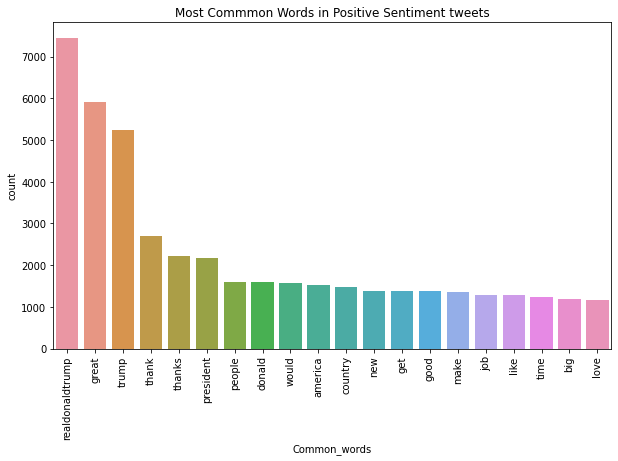

In [212]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_positive, ax=ax)
plt.title("Most Commmon Words in Positive Sentiment tweets")
plt.xticks(rotation='vertical');

 ### Finding common words for negative sentiment tweets

In [213]:
#MosT common positive words
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative.columns = ['Common_words','count']
freq_negative.style.background_gradient(cmap='Reds')

,Common_words,count
0,realdonaldtrump,1188
1,trump,977
2,people,893
3,obama,837
4,president,716
5,country,677
6,bad,675
7,would,660
8,democrat,655
9,time,645


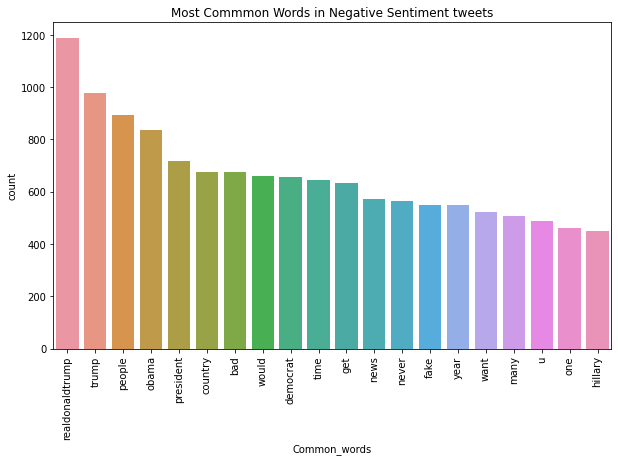

In [214]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_negative, ax=ax)
plt.title("Most Commmon Words in Negative Sentiment tweets")
plt.xticks(rotation='vertical');

In [221]:
import wordcloud
def show_wordcloud(dataframe, title):
    text = ' '.join(dataframe['content'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [216]:
wordcloud.STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

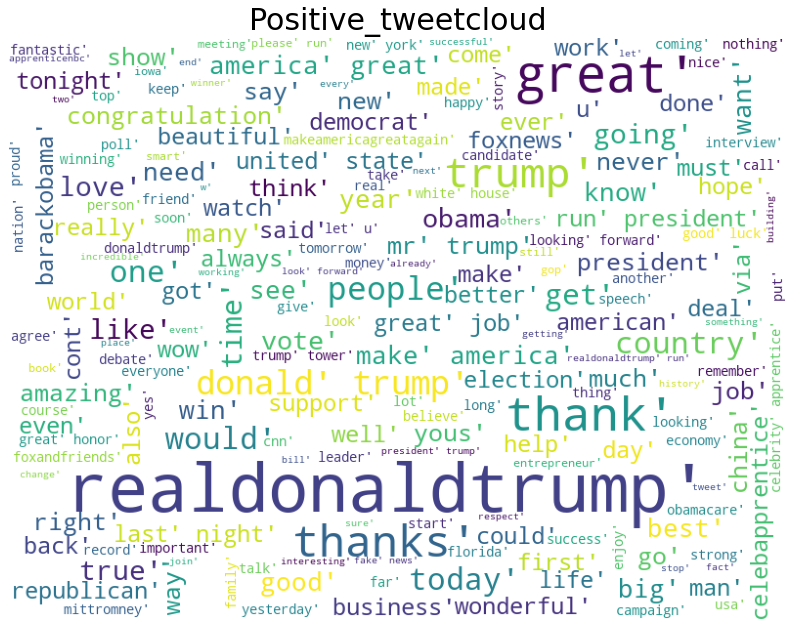

In [222]:
show_wordcloud(Positive_sent, "Positive_tweetcloud")


**- Word like "Thank", "great", "wow", "amazing", "good", "true", "best" highlighted in his positive sentiment tweet.**

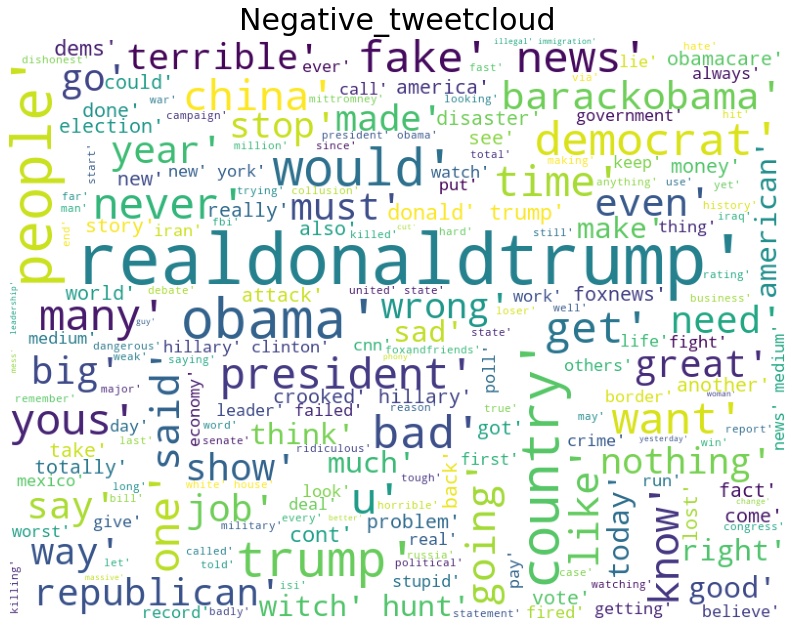

In [223]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")


**- Word like "Fake", "terrible, "never", "looser, "sad", "crooked" "witch hunt" kept frequently in his negative sentiment tweet**.

## wordcloud plot of trump tweet during impeachment movement, presidency time and before presidency time.

In [ ]:
tweets['date'] = pd.to_datetime(tweets['date'])


In [224]:
impeachment_start_date = '18-12-2019'
presedency_start_date = '17-01-2017'
start_election_campaign='16-6-2015'

In [225]:
tweets_during_impeachment_hearings=tweets.loc[tweets['date']>impeachment_start_date]         #Tweets Dataset after impeachment start date
print('tweets during impeachment from 18-12-2019 to 20-1-2020') 

presedency_start_dataset=tweets.loc[tweets['date']>presedency_start_date]                    #Dataset after he beca,e president
presedency_before_dataset=tweets.loc[tweets['date']<presedency_start_date]
tweets_during_election_campaign=presedency_before_dataset.loc[presedency_before_dataset['date']>start_election_campaign] #Dataset during his 1st election campaign

tweets during impeachment from 18-12-2019 to 20-1-2020


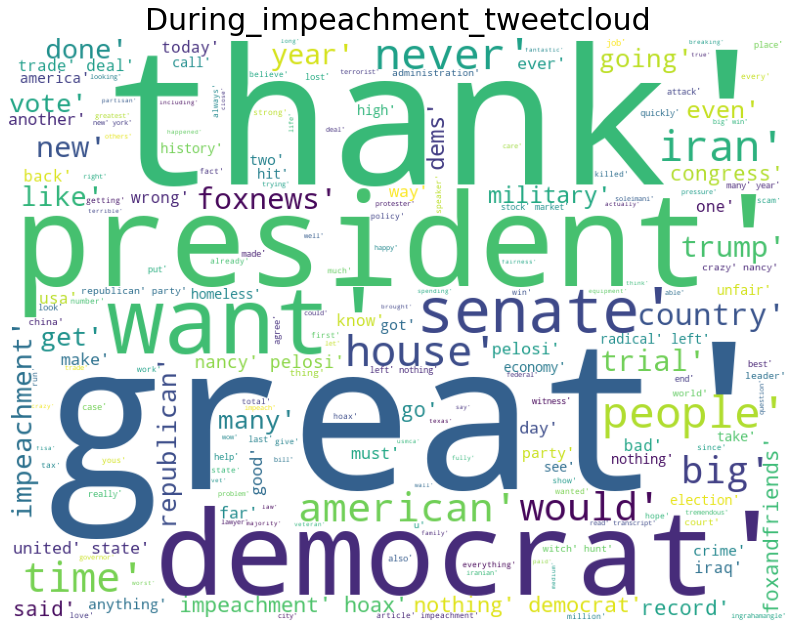

In [226]:
show_wordcloud(tweets_during_impeachment_hearings, "During_impeachment_tweetcloud")


-  **Words like " Status", " history", "senate","trial", "Congress", "Democrates", "Impeachment", "Radical left", "Witch hunt","unfair", "Nancy Pelosi" repeted frequently in his tweets After start of empeachment**

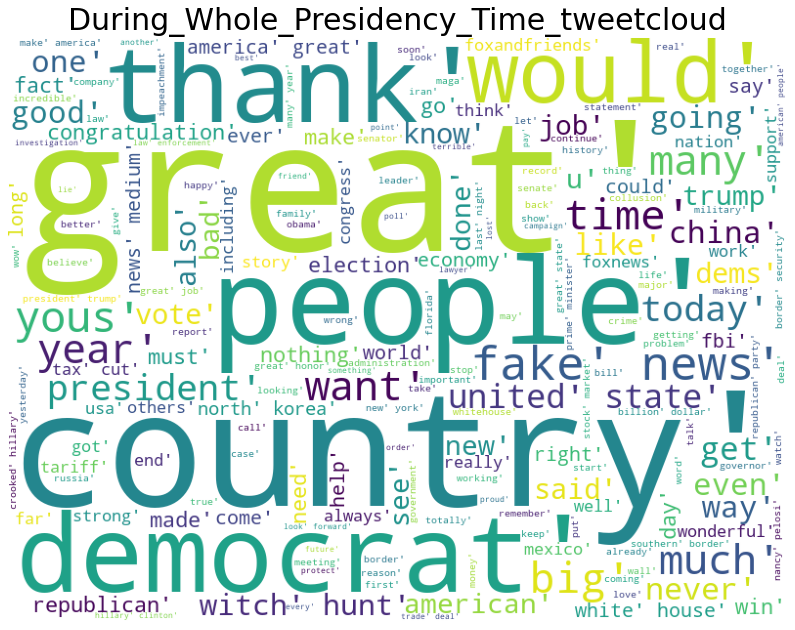

In [227]:
show_wordcloud(presedency_start_dataset, "During_Whole_Presidency_Time_tweetcloud")


- **Geo Political word:-China, Iran, Russia,Maxico, North Korea kept frquently in his tweets**

- **He kept tweeting about the electoral politics where media, parties, white house related activity continued through out his presidency.**




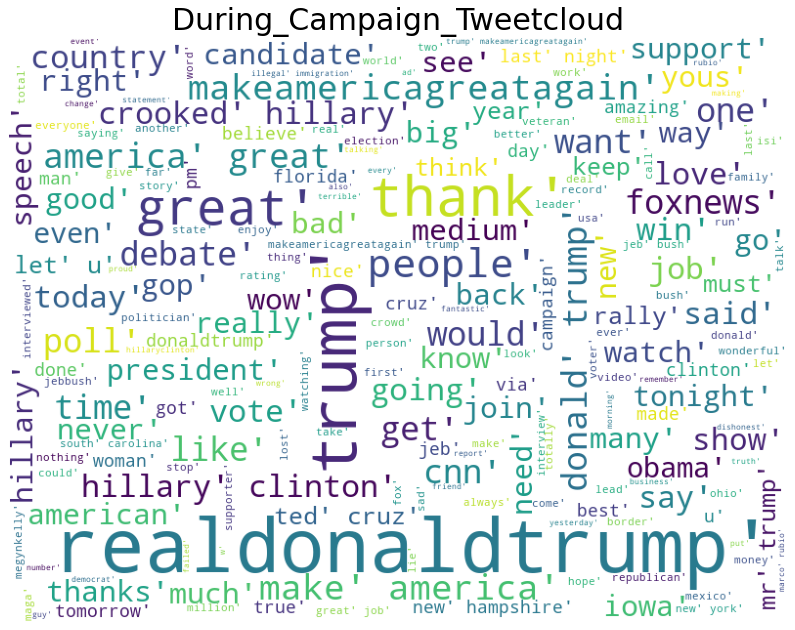

In [228]:
show_wordcloud(tweets_during_election_campaign, "During_Campaign_Tweetcloud")


* **Word like "ISIS", "Hillary", "MakeAmericaGreatAgain", "CNN" "Obama", "Job", "Multiple State names", "GOP", were the frequent word in his tweets.**


###Summary

- We imported tha data, observed the shape and data type of each column.
- We analysed the missing value by plotting the graphs and created a datrame of the column which has got missing value based on different parameter. 
- We extracted year, month, date, hour from the raw date information.
- We extracted the most liked and retweeted tweet along with their respective year.
- We created a pie chart using plotly where we plotted the proportion of tweet for each hour of the day and found that he tweets between 22:00 to 22:00 hour of the day at the most & tweets are minimum at the morning our of the day.
- He was more active during the weekdays on twitter as compare to weekend.
- He was quite active before his presidency but he gets his popularity after winning the presidency.
- Re-tweets and favourites kept increasing during his presidency time, which shows that he became popular on twitter with time.
- We applied all necessary pre processing steps to remove and alter the anamoly from the text. It helps us to explore the data more precisely.
- We plotted the most common words and their frequency from the trump tweet.
- We plotted the most common words and their frequency from the positive sentiment tweet and negative sentiment tweet.
- We plotted the wordcloud graph of the positive and negative sentiment tweet.
- We plotted the wordcloud graph of trump tweet during impeachment movement, presidency time and before presidency time.

##### Wordcloud of databases with problems

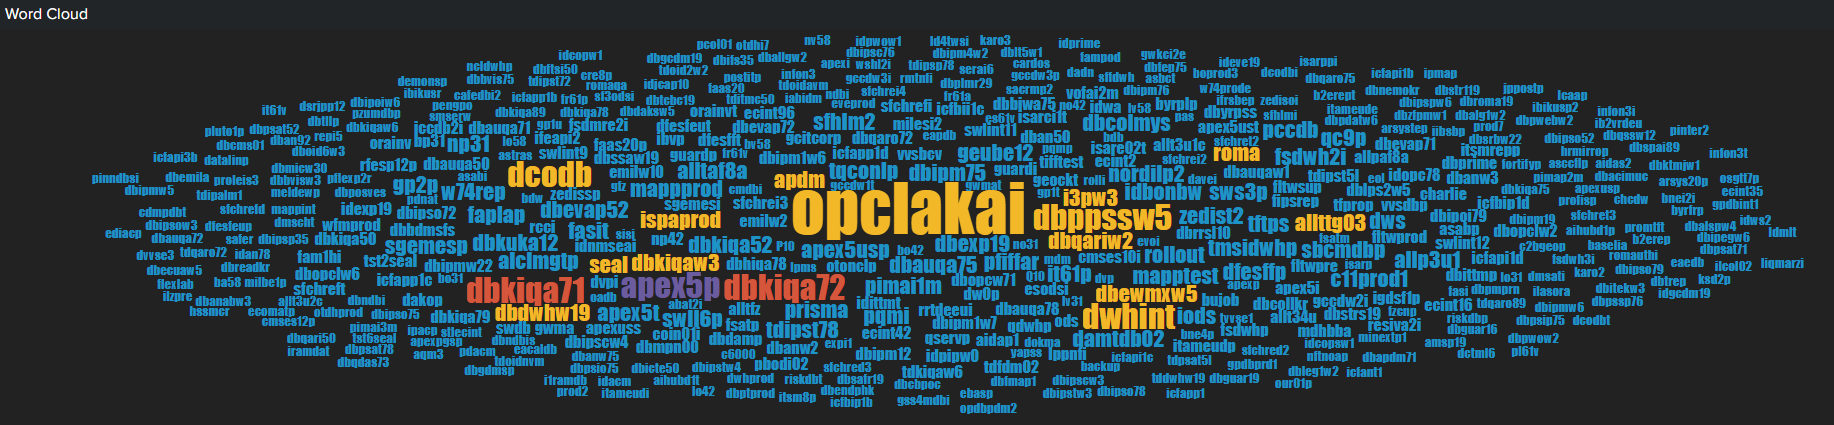